# Python for Data & Analytics - Lesson 7 
## General Python Programing - Various topics
Reminder - start recording!

## Object Oriented Programming - Class Inheritance


In [1]:
import matplotlib.image as mpimg
%pylab inline

class Pet:
    def __init__(self, name, img=None, favorite_food=None):
        self.name = name
        self.img = img
        self.favorite_food = favorite_food

    def come(self, call):
        if self.name.lower() in call.lower(): # Is the dog's name part of the call?
            img = mpimg.imread(self.img )
            imgplot = plt.imshow(img)
            plt.axis('off') 
            plt.show()
    
    def eat(self):
        print('Give us some food!')
        food = input() # Get user input
        print('\nEating the %s.' % food)
        if food == self.favorite_food:
            print('Yummy, I love it!')
           
    def get_name(self):
        return self.name

Populating the interactive namespace from numpy and matplotlib


In [2]:
# We can create multiple classes inherited from the pet class.
# Classes inherit their ancestors' methods and attributes.
class Dog(Pet):
     # Class Attribute
    species = 'Canis Lupus'

    def bark(self):
        print('Woof!')
    
class Cat(Pet):
     # Class Attribute
    species = 'Felis catus'

    def purr(self):
        print('Prrr...')

In [3]:
snoop = Dog('Snoopy', img='Snoopy.png', favorite_food='peanuts')
rufus = Cat('Rufus', img='Rufus.png', favorite_food='fish')

In [4]:
# Using a method
snoop.bark()

Woof!


In [5]:
rufus.purr()

Prrr...


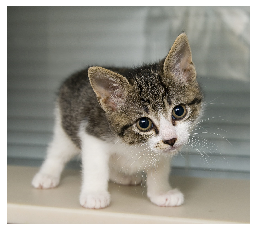

In [6]:
# We can call methods of the ancestor class similarly to those of the descendent class.
rufus.come('Come here, Rufus!')

In [7]:
rufus.eat()

Give us some food!
banana

Eating the banana.


In [8]:
# Python allows for multiple inheritance using mix in classes.
class FetchMixIn:
    def fetch(self, call):
        if call.split()[0].lower() == 'fetch':
            print(call.split()[-1])

In [9]:
# The descendent inherits methods and attributes from both classes.
class TrainedDog(Dog, FetchMixIn):
    pass

In [10]:
cash = TrainedDog('Cash', img='cash.png', favorite_food='yogurt')

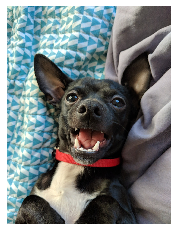

In [11]:
# Let's call a methods of the base class
cash.come('Cashy, come!')

In [12]:
# Let's call a method of the mix in class.
cash.fetch('Fetch the stick!')

stick!


In [13]:
# We can have many generations of inheritance.
class A:
    def a(self):
        print('a')

class B(A):
    def b(self):
        print('b')

class C(B):
    def c(self):
        print('c')

In [14]:
c_object = C()
c_object.a()
c_object.b()
c_object.c()

a
b
c


In [15]:
# When an ancestor and a descendent have methods of the same name, the descendent's method overrides the ancestor's.
# We can use the super() function to get a reference to the anscestor's method, and create a new method that extends it.
class D(C):
    def c(self):
        super().c()
        print('plus an extra c')

d_object = D()
d_object.c()

c
plus an extra c


## Exception Handling
Exceptions happen when something goes wrong in the code, and the code immediately stops. Different exceptions are raised for different reasons, including: 
**```ImportError```**: an import fails;
**```IndexError```**: a list is indexed with an out-of-range number;
**```NameError```**: an unknown variable is used;
**```SyntaxError```**: the code can't be parsed properly; 
**```TypeError```**: a function is called on a value of an inappropriate type;
**```ValueError```** a function is called on a value of the correct type, but with an inappropriate value.


We can use exception handling to handle exceptions gracefully.

In [16]:
3/0

ZeroDivisionError: division by zero

In [17]:
# We handle exceptions using a try / except statement.
num = input()

try:
    print (100 / float(num))
except ZeroDivisionError:
    print ('You cannot divide a number by zero.')

ValueError: could not convert string to float: 

In [18]:
# We can handle

In [19]:
num = input()

try:
    print (100 / float(num))
except ZeroDivisionError:
    print ('You cannot divide a number by zero.')
except:
    print('An unknown error has occured')


An unknown error has occured


## Interacting with Databases using SQLAlchemy
SQLAlchemy is the gold standard package for interacting with relational databases. You can install it using [this commend](https://anaconda.org/anaconda/sqlalchemy). Before you install it from Anaconda, you'd need to set ```conda config --set ssl_verify False```. 
The example below uses SQLite database, which you can [easily install on your local computer](https://www.sqlitetutorial.net/download-install-sqlite/). To run the example, you'd also need to install [sqlite's sample database](https://www.sqlitetutorial.net/sqlite-sample-database/). 

In [20]:
# We're creating an engine to hold info about our database and represent it.
from sqlalchemy import create_engine

# The double backslash in the string below let's the Python parser know that this is a real backslash and not a 
# special character (e.g. '\n').
engine = create_engine('sqlite:///C:\\Program Files\\sqlite\\db\\chinook.db', echo=True) 
# An equivalent to do it would be using a raw string, indicated by an 'r' before the string.
engine = create_engine(r'sqlite:///C:\Program Files\sqlite\db\chinook.db', echo=True)

In [21]:
# Running an ad hoc query
query = 'SELECT * FROM albums;'
results = engine.execute(query)
for i, row in enumerate(results): # enumerrate returns a counter plus one element at a time from an iterable data type.
    if i < 5:
        print(row)
results.close()

2021-09-22 08:14:52,036 INFO sqlalchemy.engine.Engine SELECT * FROM albums;
2021-09-22 08:14:52,037 INFO sqlalchemy.engine.Engine [raw sql] ()
(1, 'For Those About To Rock We Salute You', 1)
(2, 'Balls to the Wall', 2)
(3, 'Restless and Wild', 2)
(4, 'Let There Be Rock', 1)
(5, 'Big Ones', 3)


In [23]:
# Creating a persistent connection
engine = create_engine('sqlite:///C:\\Program Files\\sqlite\\db\\chinook.db', echo=True) 
connection = engine.connect()
query = 'SELECT * FROM artists;'
results = connection.execute(query)
for i, row in enumerate(results):
    if i < 5:
        for field in row: 
            print(field)
        print()
connection.close()

2021-09-22 08:14:52,791 INFO sqlalchemy.engine.Engine SELECT * FROM artists;
2021-09-22 08:14:52,793 INFO sqlalchemy.engine.Engine [raw sql] ()
1
AC/DC

2
Accept

3
Aerosmith

4
Alanis Morissette

5
Alice In Chains



For many more possibilities of working with SQLAlchemy, check out [this series](https://hackersandslackers.com/pythonic-database-management-with-sqlalchemy/) (thanks to Nana Okyere for this reference).

## Building Modules
[Here](https://packaging.python.org/) is a tutorial on how to package your code in full fledged packages.

In [9]:
from my_module import func_from_module

func_from_module()

I am a function from a module.


In [1]:
import my_module



This is in the main body of the imported script


## Using an IDE
When you write your own modules or stand alone scripts, you will probably want to use an Integrated Development Environment. The MetLife recommended IDE is VS Code - you can find the installation instructions in the [course folder](https://mydrive.metlife.com/:f:/g/personal/tal_yifat_metlife_com/Ej_-Iu3GuEdEmsZXxLAAjzsB5IcAzwefVZjEDNTq6o7nsw?e=WWaR9S). 

Check out this [VS Code Tutorial](https://code.visualstudio.com/docs/python/python-tutorial).

## Homework
1. Write a class that inherits from the ```Pet``` class with a method in the descendent class.
2. Write a mix-in class with another trained dog behavior (e.g. say hello) and redefine ```TrainedDog``` to add that new behavior. 
3. Connect to a database of your choice, perform a query, and assign the contents of one field in your query's results into a list.
4. Write a simple function, save it as a module, and import and run it from Jupyter.